# Separation of DQC peaks by SWT
### Author: Aritro Sinha Roy
#### 27 Feb, 2023

In [1]:
# load the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack as sfft

In [2]:
sns.set_theme(context='paper', style='white', palette = 'pastel', 
              font='sans-serif', font_scale = 3.2, color_codes = True, rc = None)

# read 2D DQC data
with open("data2.txt","r") as datafile:
    df = eval(datafile.read().lower())
df = np.array(df)
data = pd.DataFrame([])
data['t1'] = np.real(df[:,0])
data['t2'] = np.real(df[:,1])
data['signal'] = df[:,2]
data.head()

,t1,t2,signal
0,-1.98,-0.040000,-81.058128-97.775981j
1,-1.98,-0.038987,-56.376274-93.729406j
2,-1.98,-0.037975,-30.035345-77.834954j
3,-1.98,-0.036962,-5.476836-51.825732j
4,-1.98,-0.035949,14.468625-18.745142j


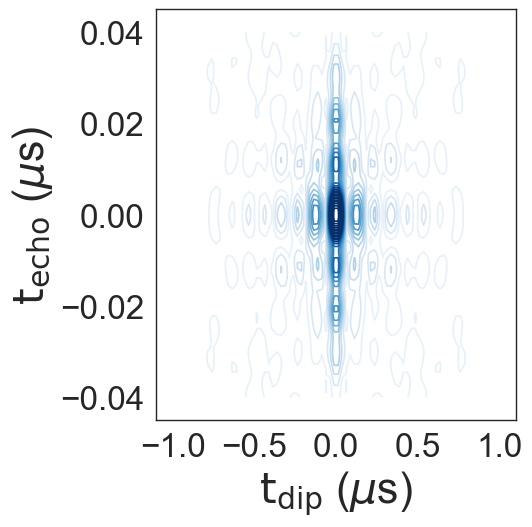

In [3]:
# plot the absolute 2D DQC signal
xval, yval, zval = data.t1.values.reshape((160,80)), data.t2.values.reshape((160,80)), data.signal.values.reshape((160,80))
zval = abs(zval)/abs(zval).max()

_resol = 100 # set image resolution
_w1, _h1 = 6, 6 # set image size

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(xval, yval, zval, vmax = 0.5, levels = 25, cmap = 'Blues')
ax.set(xlim = [-1.1,1.1], ylim = [-0.045, 0.045], xticks = [-1,-0.5,0,0.5,1], yticks = [-0.04,-0.02,0,0.02,0.04])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{t_{dip}}$ ($\mu$s)')
ax.set_ylabel(r'$\mathrm{t_{echo}}$ ($\mu$s)')

plt.tight_layout()
plt.show()

In [4]:
# define the time and the frequency domains
tm, tw = 2.0, 0.04

dqft = sfft.fftshift(np.fft.fft2(data.signal.values.reshape(160,80)))
dqft = abs(dqft) / abs(dqft).max()

dim1 = 160; dim2 = 80;
delf1 = 1/(2*tm - tw); 
delf2 = 1/(2*tw); 
f1val = np.array([(i - dim1/2.)*delf1 for i in range(1,dim1+1)]) 
f2val = np.array([(j - dim2/2.)*delf2 for j in range(1, dim2+1)])

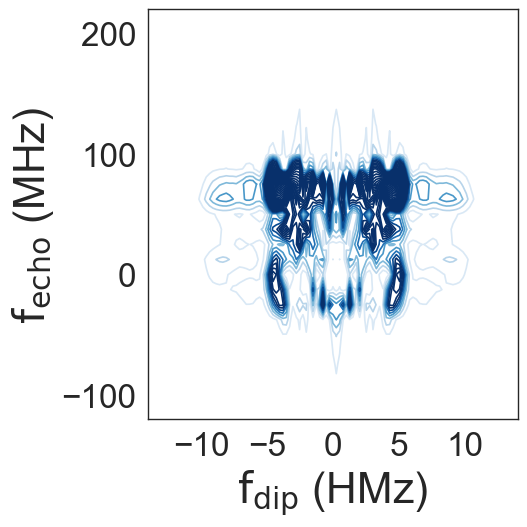

In [5]:
# set up contour parameters
_zoom, clev = 0.2, 35

# plot the 2DFT magnitude spectrum
f2v, f1v = np.meshgrid(f2val, f1val)

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft, vmax = _zoom, levels = clev, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-120, 220], xticks = [-10,-5,0,5,10], yticks = [-100,0,100,200])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

In [6]:
def fread(fname, nrow = 160, ncol = 80, op = 1):
    dat = pd.read_csv(fname, header = None)
    sig = np.array(list(map(lambda x,y: complex(x,y), dat.loc[:,0], dat.loc[:,1])))
    
    if op == 'v':
        ft = np.roll(np.fft.fft2(sig.reshape(nrow, ncol)), (0,int(ncol/2)))
    elif op == 'h':
        ft = np.roll(np.fft.fft2(sig.reshape(nrow, ncol)), (int(nrow/2),0))
    else:
        ft = sfft.fftshift(np.fft.fft2(sig.reshape(nrow, ncol)))
    return abs(ft)

# read time domain reconstruction
def tread(fname, nrow = 160, ncol = 80):
    dat = pd.read_csv(fname, header = None)
    sig = np.array(list(map(lambda x,y: complex(x,y), dat.loc[:,0], dat.loc[:,1])))
    return sig.reshape((nrow, ncol))

## Level-1

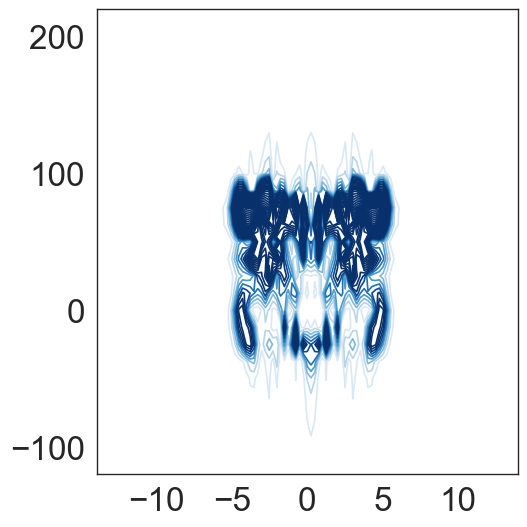

In [7]:
dqft_A1 = fread('data2B_rec_A2.txt', op = 1) 
_norm = dqft_A1.max() 
dqft_A1 = dqft_A1 / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_A1, vmax = _zoom, levels = clev, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-120, 220], xticks = [-10,-5,0,5,10], yticks = [-100,0,100,200])
ax.tick_params(axis = 'both', labelsize = 24)

plt.tight_layout()
plt.show()

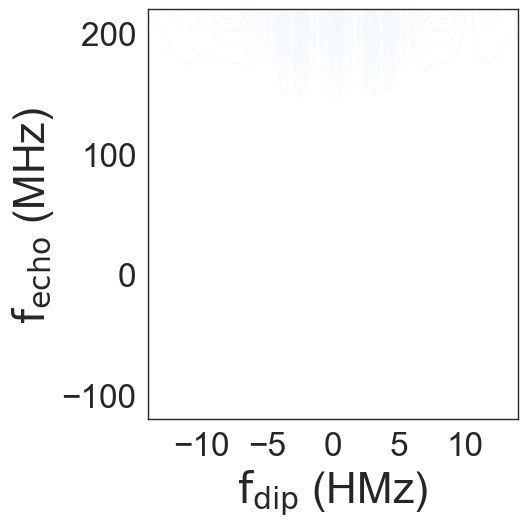

In [8]:
dqft_H1 = fread('data2B_rec_H1.txt', op = 1) / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_H1, vmax = 0.1, levels = 100, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-120, 220], xticks = [-10,-5,0,5,10], yticks = [-100,0,100,200])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

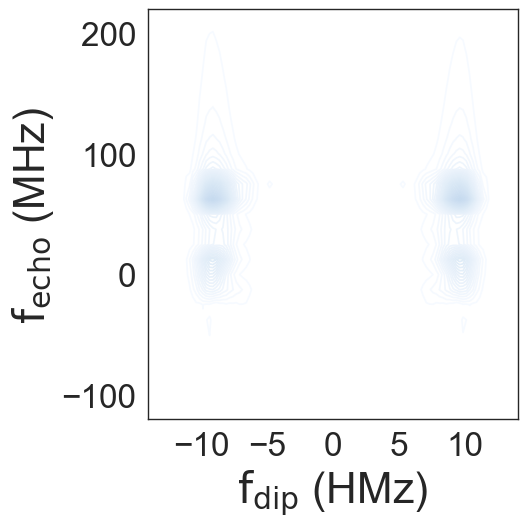

In [9]:
dqft_V1 = fread('data2B_rec_V1.txt', op = 1) / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_V1, vmax = _zoom, levels = clev, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-120, 220], xticks = [-10,-5,0,5,10], yticks = [-100,0,100,200])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

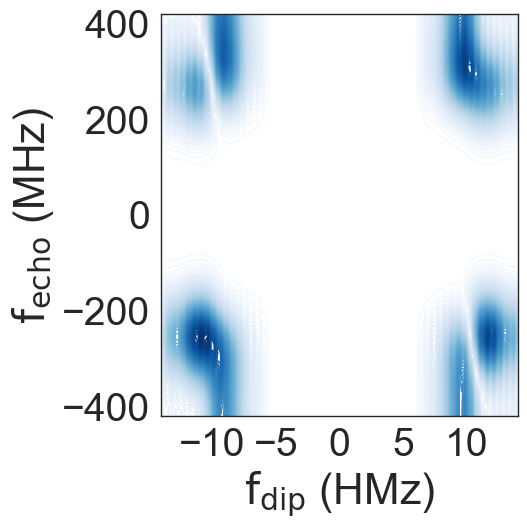

In [10]:
dqft_D1 = fread('data2B_rec_D1.txt') / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_D1, levels = 100, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-420, 420], xticks = [-10,-5,0,5,10], yticks = [-400,-200,0,200,400])
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

## Level-2

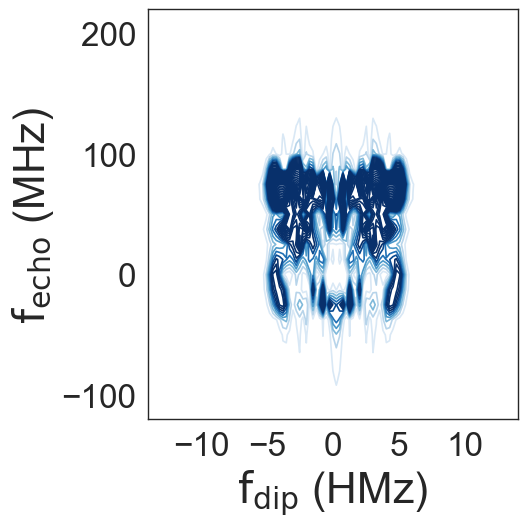

In [11]:
dqft_A2 = fread('data2B_rec_A2.txt')
_norm = dqft_A2.max() 
dqft_A2 = dqft_A2 / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_A2, vmax = _zoom, levels = clev, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-120, 220], xticks = [-10,-5,0,5,10], yticks = [-100,0,100,200])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

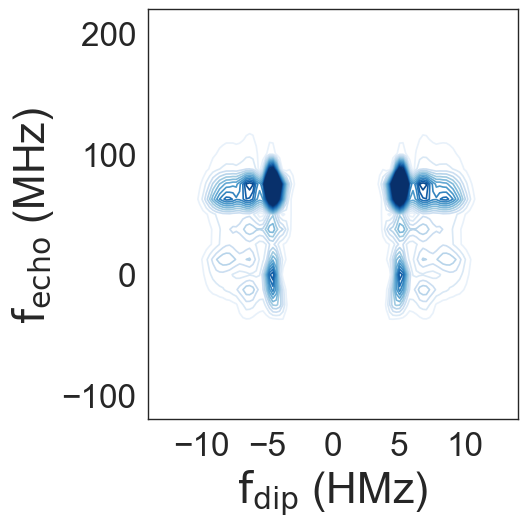

In [12]:
dqft_V2 = fread('data2B_rec_V2.txt') / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_V2, vmax = _zoom, levels = clev, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-120, 220], xticks = [-10,-5,0,5,10], yticks = [-100,0,100,200])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

## Level-3

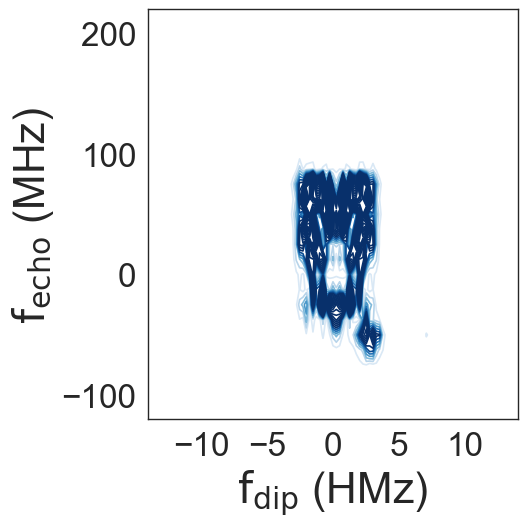

In [13]:
dqft_A3 = fread('data2B_rec_A3.txt')
_norm = dqft_A3.max() 
dqft_A3 = dqft_A3 / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_A3, vmax = _zoom, levels = clev, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-120, 220], xticks = [-10,-5,0,5,10], yticks = [-100,0,100,200])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

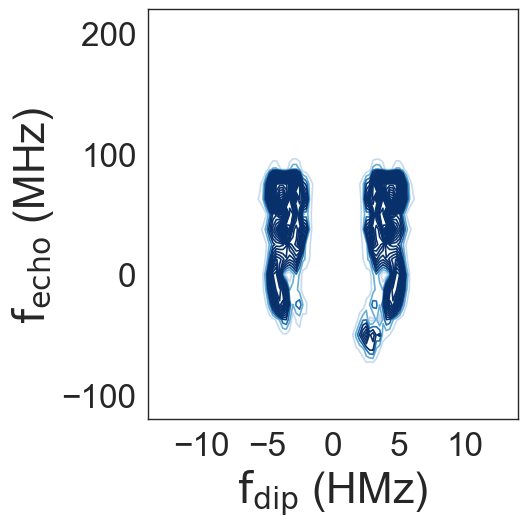

In [14]:
dqft_V3 = fread('data2B_rec_V3.txt') / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_V3, vmax = _zoom, levels = clev, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-120, 220], xticks = [-10,-5,0,5,10], yticks = [-100,0,100,200])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

## Level-4

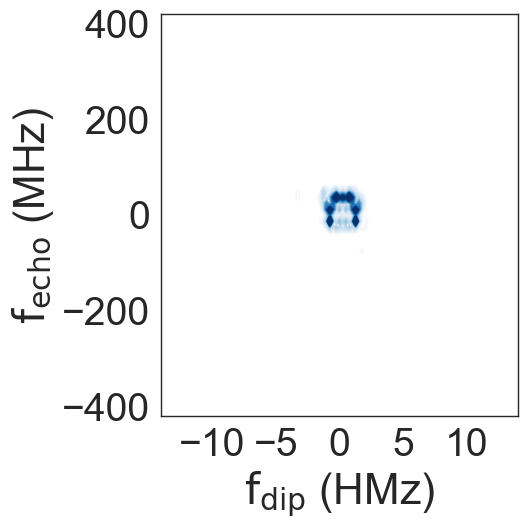

In [15]:
dqft_A4 = fread('data2B_rec_A4.txt')
_norm = dqft_A4.max() 
dqft_A4 = dqft_A4 / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_A4, vmax = 0.5, levels = 100, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-420, 420], xticks = [-10,-5,0,5,10], yticks = [-400,-200,0,200,400])
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

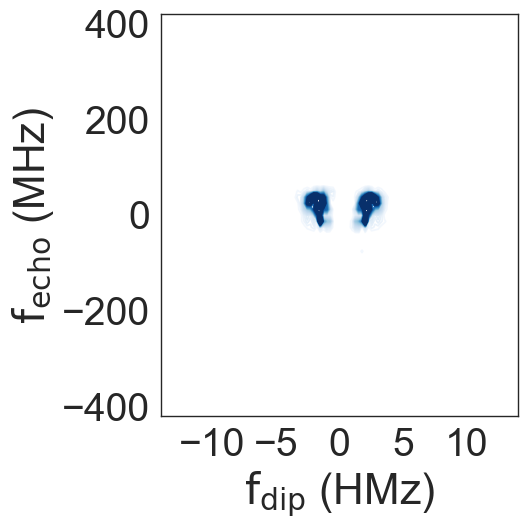

In [16]:
dqft_V4 = fread('data2B_rec_V4.txt') / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_V4, vmax = 0.5, levels = 100, cmap = 'Blues')
ax.set(xlim = [-14,14], ylim = [-420, 420], xticks = [-10,-5,0,5,10], yticks = [-400,-200,0,200,400])
ax.set_xlabel(r'$\mathrm{f_{dip}}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_{echo}}$ (MHz)')

plt.tight_layout()
plt.show()

### End of file